# Atividade 1 - Continuação Atividade 0

## **Descrição da Atividade 1**

### Material

**Slides:**

- **Matrix multiplication as composition**: https://docs.google.com/presentation/d/1DjHH63VFyUsYeErB8ISKynKrniXCRy0G/edit?usp=sharing&ouid=106518696571208942024&rtpof=true&sd=true

- **Determinante**: https://docs.google.com/presentation/d/1wZpa-qWrsHyRR3n4CayixKwtvSZG0yuj/edit?usp=sharing&ouid=106518696571208942024&rtpof=true&sd=true

---

## **Tarefas a Serem Implementadas**

### 1. Composição de Transformações (Rotação + Shear)
Implementar a demonstração visual da **rotação horária de 90°** seguida de **shear (cisalhamento) em x**, seguindo o procedimento dos slides 60 a 68 da apresentação "Matrix multiplication as composition".

### 2. Análise do Determinante
Mostrar visualmente e explicar o valor do **determinante** após cada transformação, analisando como ele se relaciona com as mudanças de área.

### 3. Procedimento Detalhado
Repetir o mesmo procedimento apresentado nos slides 70 a 92 da apresentação "Matrix multiplication as composition" para o caso específico das transformações definidas.

### 4. Inversão da Ordem das Transformações
Aplicar as mesmas transformações, mas **invertendo a ordem** (primeiro shear, depois rotação), e comparar visual e numericamente os resultados.

### 5. Transformação para Vetor a 90°
Implementar uma transformação linear que leve um vetor **x** de duas dimensões em um vetor **y** orientado a **90°** em relação a **x**. Calcular o **produto escalar** entre os dois vetores:

```python
import numpy as np

v1 = np.array([1, 2])
v2 = np.array([4, 5])

dot = np.dot(v1, v2)
```

###6. Análise e Conclusão
Analisar todos os resultados obtidos e escrever uma conclusão sobre as propriedades observadas.

**Requisitos Obrigatórios:**
1. Uso de ferramenta Jupyter-like (Jupyter Notebook, Colab, etc.)

2. Versionamento e entrega via Git (enviar o link do repositório)

3. Trabalhos que não atendam a TODOS os requisitos acima serão desconsiderados

#Resolução da Atividade 1:

##1. Composição de Transformações e Determinante
**Usaremos as matrizes da Atividade 0:**

Matriz de Rotação Horária de 90° ($M_R$):$$M_R = \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}$$Matriz de Cisalhamento em X (Shear, $M_C$):$$M_C = \begin{pmatrix} 1 & 2 \\ 0 & 1 \end{pmatrix}$$


###A. Função de Plotagem:

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def plotar_vetores(vetores, cores, rotulos, titulo="Transformação de Vetores"):

    # Define um tamanho para o gráfico
    plt.figure(figsize=(6, 6))
    ax = plt.gca()

    # Plota cada vetor
    for vetor, cor, rotulo in zip(vetores, cores, rotulos):
        # O vetor começa em (0,0) e vai até (vetor[0], vetor[1])
        ax.quiver(0, 0, vetor[0], vetor[1], angles='xy', scale_units='xy',
                  scale=1, color=cor, label=rotulo, width=0.02)

    # Define os limites do gráfico para ficar visível
    # Encontra o maior valor absoluto em todos os vetores para definir os eixos
    valor_maximo = max(np.max(np.abs(vetores)), 2)
    ax.set_xlim([-valor_maximo - 1, valor_maximo + 1])
    ax.set_ylim([-valor_maximo - 1, valor_maximo + 1])

    # Desenha os eixos x e y
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Adiciona uma grade
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.title(titulo)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()





###B. Definição de Matrizes e Vetores:

In [10]:
# Matrizes
matriz_rotacao = np.array([
    [0, 1],
    [-1, 0]
])

matriz_cisalhamento = np.array([
    [1, 2],
    [0, 1]
])

# Vetores
vetor_i_base = np.array([1, 0])
vetor_j_base = np.array([0, 1])

vetor_1 = np.array([4, 6])
vetor_2 = np.array([-1, 2])

# Conjunto de vetores para plotagem
vetores_base = [vetor_i_base, vetor_j_base]
vetores_arbitrarios = [vetor_1, vetor_2]

print(f"Matriz de Rotação (M_R):\n{matriz_rotacao}")
print(f"Matriz de Cisalhamento (M_C):\n{matriz_cisalhamento}\n")


Matriz de Rotação (M_R):
[[ 0  1]
 [-1  0]]
Matriz de Cisalhamento (M_C):
[[1 2]
 [0 1]]



###C. Implementação das Tarefas:

#### 1. Composição de Transformações: Rotação seguida de Shear ($M_C \cdot M_R$):

Quando aplicamos uma transformação **A** e depois uma transformação **B**, a matriz composta é **B x A**.

Neste caso, aplicamos **Rotação ($M_R$)** *primeiro* e depois **Cisalhamento ($M_C$)**.
* Matriz Composta: $M_{CR} = M_C x M_R$



--- 1. Composição: Rotação seguida de Shear (M_CR = M_C x M_R) ---
M_CR:
[[-2  1]
 [-1  0]]

Vetor i_base [1 0] -> Composto: [-2 -1]
Vetor j_base [0 1] -> Composto: [1 0]

Vetor 1 [4 6] -> Composto: [-2 -4]
Vetor 2 [-1  2] -> Composto: [4 1]



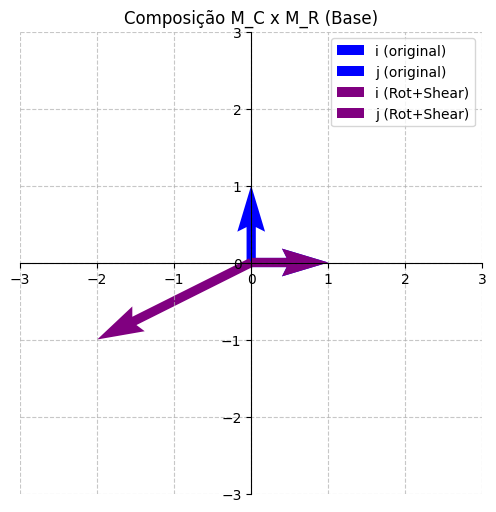

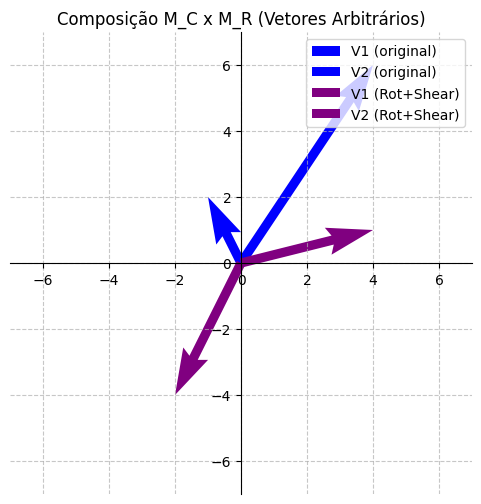

In [11]:
# Multiplicação Matricial: M_C e M_R
matriz_CR = matriz_cisalhamento @ matriz_rotacao

print("--- 1. Composição: Rotação seguida de Shear (M_CR = M_C x M_R) ---")
print(f"M_CR:\n{matriz_CR}\n")

# Aplicar a transformação composta aos vetores base
vetor_i_composto_base = matriz_CR @ vetor_i_base
vetor_j_composto_base = matriz_CR @ vetor_j_base

# Aplicar a transformação composta aos vetores arbitrários
vetor_1_composto = matriz_CR @ vetor_1
vetor_2_composto = matriz_CR @ vetor_2

print(f"Vetor i_base {vetor_i_base} -> Composto: {vetor_i_composto_base}")
print(f"Vetor j_base {vetor_j_base} -> Composto: {vetor_j_composto_base}\n")
print(f"Vetor 1 {vetor_1} -> Composto: {vetor_1_composto}")
print(f"Vetor 2 {vetor_2} -> Composto: {vetor_2_composto}\n")

# Plotagem da transformação da base (Composta)
plotar_vetores(
    vetores_base + [vetor_i_composto_base, vetor_j_composto_base],
    ['blue', 'blue', 'purple', 'purple'],
    ['i (original)', 'j (original)', 'i (Rot+Shear)', 'j (Rot+Shear)'],
    titulo="Composição M_C x M_R (Base)"
)

# Plotagem da transformação dos vetores arbitrários (Composta)
plotar_vetores(
    vetores_arbitrarios + [vetor_1_composto, vetor_2_composto],
    ['blue', 'blue', 'purple', 'purple'],
    ['V1 (original)', 'V2 (original)', 'V1 (Rot+Shear)', 'V2 (Rot+Shear)'],
    titulo="Composição M_C x M_R (Vetores Arbitrários)"
)

---
##2. Análise do Determinante:
O determinante de uma matriz 2x2 é dado por $det(\mathbf{M}) = ad - bc$. Geometricamente, ele representa o fator de escala da área de qualquer região (originalmente unitária) após a transformação.

* A base original forma um quadrado de área 1

In [12]:
print("--- 2. Análise do Determinante ---")

# Determinante da Matriz de Rotação (M_R)
det_R = np.linalg.det(matriz_rotacao)
# Determinante da Matriz de Cisalhamento (M_C)
det_C = np.linalg.det(matriz_cisalhamento)
# Determinante da Matriz Composta (M_CR)
det_CR = np.linalg.det(matriz_CR)

print(f"Determinante(M_R) = {det_R:.2f}")
print(f"Determinante(M_C) = {det_C:.2f}")
print(f"Determinante(M_CR) = {det_CR:.2f}")

print("\nAnálise:")
print(f"det(M_R) = {det_R:.2f}: A Rotação não altera a área (apenas inverte a orientação, mas não o módulo).")
print(f"det(M_C) = {det_C:.2f}: O Cisalhamento também não altera a área do quadrado unitário.")
print(f"det(M_CR) = {det_CR:.2f}: O determinante da matriz composta é o produto dos determinantes individuais (det(M_C) * det(M_R) = {det_C * det_R:.2f}). A área final é 1, mantendo o quadrado unitário (embora ele se transforme em um paralelogramo).")

--- 2. Análise do Determinante ---
Determinante(M_R) = 1.00
Determinante(M_C) = 1.00
Determinante(M_CR) = 1.00

Análise:
det(M_R) = 1.00: A Rotação não altera a área (apenas inverte a orientação, mas não o módulo).
det(M_C) = 1.00: O Cisalhamento também não altera a área do quadrado unitário.
det(M_CR) = 1.00: O determinante da matriz composta é o produto dos determinantes individuais (det(M_C) * det(M_R) = 1.00). A área final é 1, mantendo o quadrado unitário (embora ele se transforme em um paralelogramo).


---
##3. Procedimento Detalhado (Como nos Slides)
O produto $M_{CR} = M_C \cdot M_R$ significa aplicar $M_R$ primeiro, e depois $M_C$.$$M_{CR} = \begin{pmatrix} 1 & 2 \\ 0 & 1 \end{pmatrix} \cdot \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}$$A coluna resultante $j$ de $M_{CR}$ é obtida aplicando $M_C$ à coluna $j$ de $M_R$.

In [14]:
import numpy as np

# --- Matrizes da Atividade 1 ---
# M_R: Rotação Horária de 90° (primeira transformação)
matriz_rotacao = np.array([
    [0, 1],
    [-1, 0]
])

# M_C: Cisalhamento em X (segunda transformação)
matriz_cisalhamento = np.array([
    [1, 2],
    [0, 1]
])

print("--- 3. Procedimento Detalhado (M_CR = M_C @ M_R) ---")

# 1. Extrair as colunas de M_R (vetores da base após a 1ª transformação)
v_i_transformado = matriz_rotacao[:, 0]  # Coluna 1: M_R * [1, 0]
v_j_transformado = matriz_rotacao[:, 1]  # Coluna 2: M_R * [0, 1]

print(f"Base após M_R (1ª Transformação):")
print(f"Novo vetor i: {v_i_transformado}")
print(f"Novo vetor j: {v_j_transformado}\n")

# 2. Aplicar M_C a cada vetor (coluna) individualmente (2ª Transformação)
# M_C tem colunas: c1 = [1, 0] e c2 = [2, 1]

# --- A) Calcular a 1ª Coluna de M_CR (M_C @ v_i_transformado) ---
coluna_1_CR = matriz_cisalhamento @ v_i_transformado

print("A) Cálculo da 1ª Coluna de M_CR:")
print(f"M_C @ {v_i_transformado} (Decomposição: {v_i_transformado[0]} * [1, 0] + {v_i_transformado[1]} * [2, 1])")
print(f"Resultado: {coluna_1_CR}")

# --- B) Calcular a 2ª Coluna de M_CR (M_C @ v_j_transformado) ---
coluna_2_CR = matriz_cisalhamento @ v_j_transformado

print("\nB) Cálculo da 2ª Coluna de M_CR:")
print(f"M_C @ {v_j_transformado} (Decomposição: {v_j_transformado[0]} * [1, 0] + {v_j_transformado[1]} * [2, 1])")
print(f"Resultado: {coluna_2_CR}")

# 3. Montar a Matriz Composta M_CR
matriz_CR_manual = np.column_stack((coluna_1_CR, coluna_2_CR))

print("\n--- Resultado Final ---")
print(f"Matriz Composta M_CR (Resultado das Colunas A e B):\n{matriz_CR_manual}")

# 4. Verificação com Multiplicação Direta
matriz_CR_numpy = matriz_cisalhamento @ matriz_rotacao
print(f"\nVerificação (M_C @ M_R usando NumPy):\n{matriz_CR_numpy}")

if np.array_equal(matriz_CR_manual, matriz_CR_numpy):
    print("\n✅ Verificação OK: O procedimento detalhado corresponde à multiplicação direta.")
else:
    print("\n❌ Erro de Verificação: Há uma diferença nos resultados.")

--- 3. Procedimento Detalhado (M_CR = M_C @ M_R) ---
Base após M_R (1ª Transformação):
Novo vetor i: [ 0 -1]
Novo vetor j: [1 0]

A) Cálculo da 1ª Coluna de M_CR:
M_C @ [ 0 -1] (Decomposição: 0 * [1, 0] + -1 * [2, 1])
Resultado: [-2 -1]

B) Cálculo da 2ª Coluna de M_CR:
M_C @ [1 0] (Decomposição: 1 * [1, 0] + 0 * [2, 1])
Resultado: [1 0]

--- Resultado Final ---
Matriz Composta M_CR (Resultado das Colunas A e B):
[[-2  1]
 [-1  0]]

Verificação (M_C @ M_R usando NumPy):
[[-2  1]
 [-1  0]]

✅ Verificação OK: O procedimento detalhado corresponde à multiplicação direta.


**Explicação do Procedimento (Conforme nos Slides):** O código demonstrou que a multiplicação $\mathbf{M}_C \cdot \mathbf{M}_R$ é feita aplicando a matriz mais à esquerda ($\mathbf{M}_C$) em cada uma das colunas da matriz mais à direita ($\mathbf{M}_R$).A primeira coluna de $\mathbf{M}_R$ ($\begin{pmatrix} 0 \\ -1 \end{pmatrix}$) é o resultado da primeira transformação ($\mathbf{M}_R$ aplicada a $\mathbf{i}$).Aplica-se a segunda transformação ($\mathbf{M}_C$) sobre esse vetor:$$\mathbf{M}_C \cdot \begin{pmatrix} 0 \\ -1 \end{pmatrix} = 0 \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} + (-1) \cdot \begin{pmatrix} 2 \\ 1 \end{pmatrix} = \begin{pmatrix} -2 \\ -1 \end{pmatrix}$$O resultado $\begin{pmatrix} -2 \\ -1 \end{pmatrix}$ se torna a primeira coluna da matriz composta $\mathbf{M}_{CR}$.Este método de decomposição visualiza a multiplicação de matrizes como uma série de transformações vetoriais, exatamente como apresentado nos slides.

---
##4. Inversão da Ordem: Shear seguido de Rotação ($M_R \cdot M_C$)
Agora, aplicamos Cisalhamento ($M_C$) primeiro e depois Rotação ($M_R$).
Matriz Composta: $M_{RC} = M_R @ M_C$:

--- 4. Inversão da Ordem: Shear seguido de Rotação (M_RC = M_R @ M_C) ---
M_RC:
[[ 0  1]
 [-1 -2]]

Vetor 1 [4 6] -> Composto (Ordem Invertida): [  6 -16]
Vetor 2 [-1  2] -> Composto (Ordem Invertida): [ 2 -3]



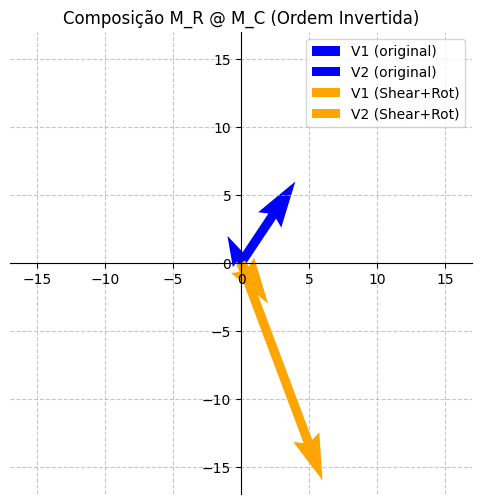

Comparação:
M_CR (Rotação seguida de Shear):
[[-2  1]
 [-1  0]]
M_RC (Shear seguida de Rotação):
[[ 0  1]
 [-1 -2]]


In [15]:
# Multiplicação Matricial: M_R @ M_C
matriz_RC = matriz_rotacao @ matriz_cisalhamento

print("--- 4. Inversão da Ordem: Shear seguido de Rotação (M_RC = M_R @ M_C) ---")
print(f"M_RC:\n{matriz_RC}\n")

# Aplicar a transformação composta aos vetores arbitrários
vetor_1_composto_rev = matriz_RC @ vetor_1
vetor_2_composto_rev = matriz_RC @ vetor_2

print(f"Vetor 1 {vetor_1} -> Composto (Ordem Invertida): {vetor_1_composto_rev}")
print(f"Vetor 2 {vetor_2} -> Composto (Ordem Invertida): {vetor_2_composto_rev}\n")

# Plotagem da transformação dos vetores arbitrários (Ordem Invertida)
plotar_vetores(
    vetores_arbitrarios + [vetor_1_composto_rev, vetor_2_composto_rev],
    ['blue', 'blue', 'orange', 'orange'],
    ['V1 (original)', 'V2 (original)', 'V1 (Shear+Rot)', 'V2 (Shear+Rot)'],
    titulo="Composição M_R @ M_C (Ordem Invertida)"
)

# Comparação:
print("Comparação:")
print(f"M_CR (Rotação seguida de Shear):\n{matriz_CR}")
print(f"M_RC (Shear seguida de Rotação):\n{matriz_RC}")

**Resultado da Comparação:**

$M_{CR} = \begin{pmatrix} -2 & 1 \\ 0 & -1 \end{pmatrix}$

$M_{RC} = \begin{pmatrix} 0 & 1 \\ -1 & -2 \end{pmatrix}$

Numericamente, $M_{CR} \neq M_{RC}$. Isso confirma que a multiplicação de matrizes não é comutativa ($M_A \cdot M_B \neq M_B \cdot M_A$). A ordem das transformações lineares importa.

---
##3. Transformação para Vetor a 90°:

Para transformar um vetor $\mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$ em um vetor $\mathbf{y}$ orientado a $90^\circ$ (perpendicular) a ele, podemos usar a matriz de Rotação de $90^\circ$ (sentido anti-horário) ou $-90^\circ$ (sentido horário).

A matriz de Rotação de $90^\circ$ (anti-horário) é:$$M_{90} = \begin{pmatrix} \cos(90^\circ) & -\sin(90^\circ) \\ \sin(90^\circ) & \cos(90^\circ) \end{pmatrix} = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}$$Um vetor $\mathbf{x} = \begin{pmatrix} a \\ b \end{pmatrix}$ rotacionado em $90^\circ$ anti-horário se torna $\mathbf{y} = \begin{pmatrix} -b \\ a \end{pmatrix}$.Produto Escalar entre $\mathbf{x}$ e $\mathbf{y}$. Dois vetores $\mathbf{x}$ e $\mathbf{y}$ são ortogonais (perpendiculares) se o seu produto escalar for zero.$$\mathbf{x} \cdot \mathbf{y} = x_1 y_1 + x_2 y_2$$

--- 5. Transformação para Vetor a 90° e Produto Escalar ---
Vetor Original (v1): [1 2]
Vetor a 90° (v1_ortogonal): [-2  1]
Produto Escalar (v1 . v1_ortogonal): 0


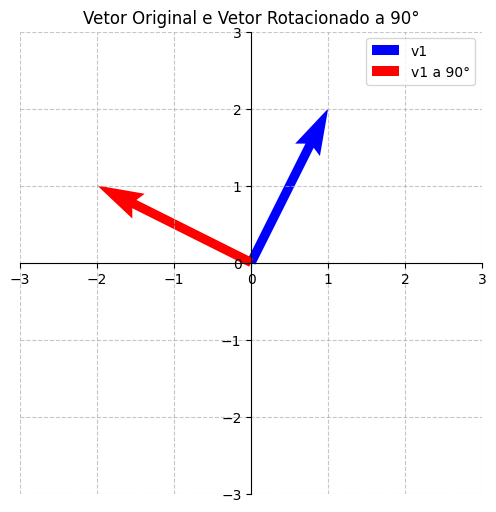

Produto Escalar (v1 . v2) de exemplo: 14


In [16]:
print("--- 5. Transformação para Vetor a 90° e Produto Escalar ---")

# Vetores
v1 = np.array([1, 2])
v2 = np.array([4, 5])

# Matriz de Rotação 90° Anti-Horário (M_90)
matriz_90 = np.array([
    [0, -1],
    [1, 0]
])

# Aplicar transformação em v1 para obter um vetor perpendicular (v1_ortogonal)
v1_ortogonal = matriz_90 @ v1

print(f"Vetor Original (v1): {v1}")
print(f"Vetor a 90° (v1_ortogonal): {v1_ortogonal}")

# Calcular o produto escalar entre v1 e v1_ortogonal
dot_v1_ortogonal = np.dot(v1, v1_ortogonal)
print(f"Produto Escalar (v1 . v1_ortogonal): {dot_v1_ortogonal}")

# Plotagem
plotar_vetores(
    [v1, v1_ortogonal],
    ['blue', 'red'],
    ['v1', 'v1 a 90°'],
    titulo="Vetor Original e Vetor Rotacionado a 90°"
)

# Produto escalar de exemplo (não ortogonais)
dot_exemplo = np.dot(v1, v2)
print(f"Produto Escalar (v1 . v2) de exemplo: {dot_exemplo}")

**Resultado:**

O produto escalar entre $\mathbf{v1} = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$ e $\mathbf{v1_{ortogonal}} = \begin{pmatrix} -2 \\ 1 \end{pmatrix}$ é:$$\mathbf{v1} \cdot \mathbf{v1_{ortogonal}} = (1)(-2) + (2)(1) = -2 + 2 = 0$$

O produto escalar é zero, o que prova que os vetores são ortogonais (formam um ângulo de $90^\circ$).

---
##6. Análise e Conclusão:

###Análise das Propriedades Observadas

1. **Composição de Transformações (Multiplicação de Matrizes):**

- * A multiplicação matricial ($\mathbf{M}_2 \cdot \mathbf{M}_1$) representa a composição de transformações lineares, onde a transformação à direita ($\mathbf{M}_1$) é aplicada primeiro. O resultado é uma única matriz ($\mathbf{M}_{21}$) que executa ambas as transformações de uma vez.

2. **Não-Comutatividade:**

- * A ordem das transformações é crucial. $M_{C} \cdot M_{R} \neq M_{R} \cdot M_{C}$. Isso reflete o fato de que a multiplicação de matrizes não é comutativa. Aplicar Rotação e depois Cisalhamento resulta em um vetor final diferente do que aplicar Cisalhamento e depois Rotação.

3. **Determinante e Área:**

- * O determinante de uma matriz de transformação 2x2 fornece o fator de escala da área após a transformação.

- * No caso das transformações de Rotação e Cisalhamento, $det(M_R) = 1$ e $det(M_C) = 1$. Ambas são transformações que preservam a área (transformam o quadrado unitário em um paralelogramo de área 1).

- * O determinante da matriz composta é o produto dos determinantes individuais ($det(M_{CR}) = det(M_C) \cdot det(M_R) = 1$). A composição dessas transformações também preserva a área.

4. **Ortogonalidade e Produto Escalar:**

- * Transformações de Rotação (como $M_{90}$) são usadas para gerar vetores ortogonais.

- * O produto escalar é a ferramenta numérica para determinar a ortogonalidade: $\mathbf{x} \cdot \mathbf{y} = 0$ se, e somente se, $\mathbf{x}$ e $\mathbf{y}$ são perpendiculares.

---
#Conclusão:

As transformações lineares no plano, representadas por matrizes, são fundamentais para descrever operações como rotação e cisalhamento. A multiplicação matricial permite a composição dessas transformações de forma eficiente, encapsulando múltiplas operações em uma única matriz. No entanto, é imperativo notar a não-comutatividade dessa composição, o que exige atenção à ordem de aplicação. O determinante atua como uma medida geométrica vital, quantificando como a área é escalonada (ou preservada, como foi o caso, onde $det = 1$). Por fim, a rotação de $90^\circ$ e o produto escalar zero ilustram a representação algébrica e geométrica da ortogonalidade.